<a href="https://colab.research.google.com/github/dellahi49/MachinLearning-Projects/blob/main/mini_projet_RLineair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#l'acces au Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#les bibliotheque utilises
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
#datasets leoad
dataset = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/insurance.csv")

In [7]:
#les 5 premier ligne de dataset
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
# Encodage des variables catégorielles en valeurs numériques
#car La régression linéaire n’accepte que des valeurs numériques
dataset_encoded = pd.get_dummies(
    dataset,
    columns=["sex", "smoker", "region"],
    drop_first=True
)

dataset_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


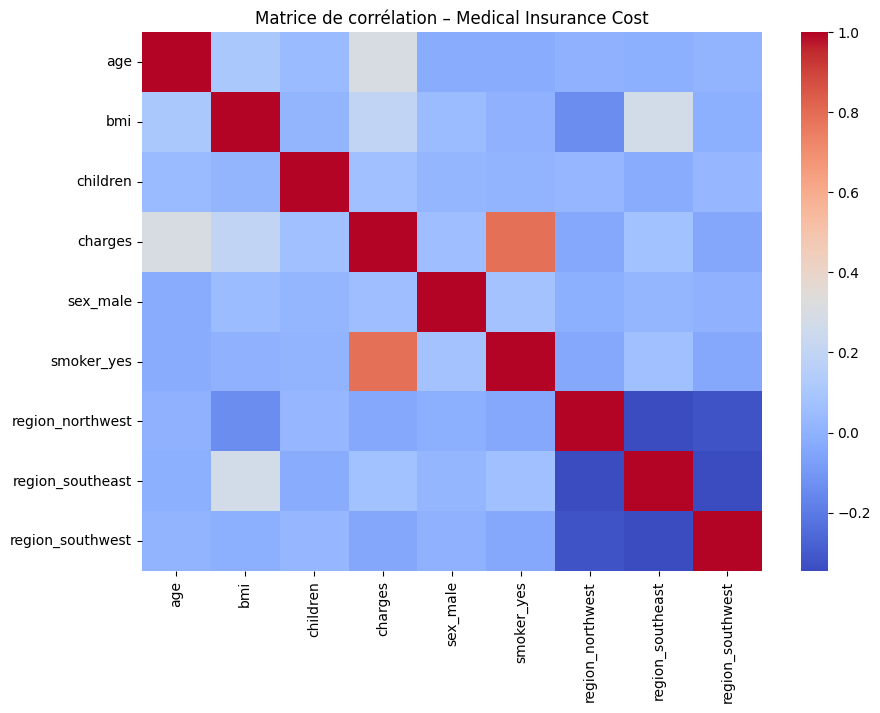

In [9]:
# Visualisation de la matrice de corrélation (heatmap)
plt.figure(figsize=(10,7))
sns.heatmap(dataset_encoded.corr(), cmap="coolwarm")
plt.title("Matrice de corrélation – Medical Insurance Cost")
plt.show()


In [10]:
# Séparation des variables explicatives et de la variable cible
X = dataset_encoded.drop("charges", axis=1)
y = dataset_encoded["charges"]

In [11]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
# Formalisation du model :
print("Modèle mathématique :")
print("charges = β0 + Σ βi xi + ε")

Modèle mathématique :
charges = β0 + Σ βi xi + ε


In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
print("Intercept (β0) :", model.intercept_)

coeffs = pd.DataFrame({
    "Variable": X.columns,
    "Coefficient βi": model.coef_
})

coeffs

Intercept (β0) : -11931.21905032666


,Variable,Coefficient βi
0,age,256.975706
1,bmi,337.092552
2,children,425.278784
3,sex_male,-18.591692
4,smoker_yes,23651.128856
5,region_northwest,-370.677326
6,region_southeast,-657.864297
7,region_southwest,-809.799354


In [15]:
y_pred = model.predict(X_test)

In [16]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Coefficient de détermination (R²):", r2)

Mean Squared Error (MSE): 33596915.85136145
Coefficient de détermination (R²): 0.7835929767120724


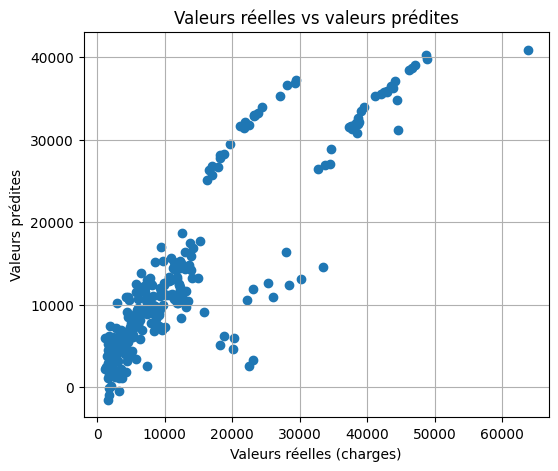

In [17]:
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Valeurs réelles (charges)")
plt.ylabel("Valeurs prédites")
plt.title("Valeurs réelles vs valeurs prédites")
plt.grid(True)
plt.show()